## マッチング  
$G = (V, E)$をグラフとし、$M \subseteq{E}$とする。$M$のどの2辺も同じ頂点に接続しないとき$M$をマッチング(matching)という  
並木、Pythonによる数理最適化入門、朝倉書店、P142  

例  
$M_1 = \{(1,2),(3,5),(4,6)\}$はマッチング  
$M_2 = \{(1,2),(2,4),(5,6)\}$はマッチングでない

In [1]:
#並木、Pythonによる数理最適化入門、P143 最大マッチング、重み最大マッチングの例
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

{0: array([-0.42828069,  0.8928422 ]), 1: array([0.25483079, 0.47797987]), 2: array([1.        , 0.28719885]), 3: array([-0.44911853,  0.46852251]), 4: array([0.01521092, 0.0155636 ]), 5: array([ 0.31871519, -0.45797141]), 6: array([-0.50092487, -0.11826284]), 7: array([-0.31070262, -0.59983589]), 8: array([ 0.10026981, -0.9660369 ])}


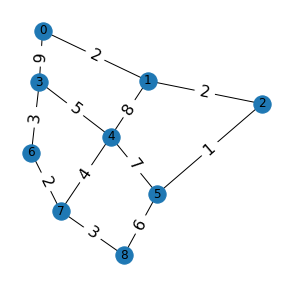

In [2]:
#Pythonで学ぶネットワーク分析 ColaboratoryとNetworkXを使った実践入門 P105の書き方を参照
G = nx.Graph()
G.add_nodes_from(range(0,9))
G.add_weighted_edges_from([(0,1,2),(1,2,2),(0,3,9),(1,4,8),(2,5,1),(3,4,5),(4,5,7),(3,6,3),(4,7,4),(5,8,6),(6,7,2),(7,8,3)])

plt.figure(figsize=(5,5))
pos = nx.spring_layout(G)
print(pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u,v): d['weight'] for u,v,d in G.edges(data=True)})
nx.draw_networkx_labels(G,pos)
plt.axis('off')
plt.show()

In [3]:
M = nx.maximal_matching(G)
mw = nx.max_weight_matching(G)
print(M)
print(mw)

{(0, 1), (2, 5), (3, 4), (6, 7)}
{(1, 4), (0, 3), (8, 5), (6, 7)}


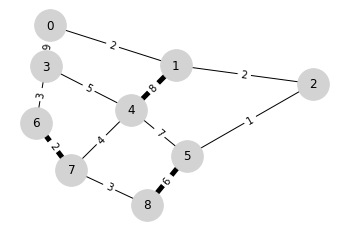

In [4]:
nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=1000, width=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=mw, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={(u,v): d['weight'] for u,v,d in G.edges(data=True)})
plt.axis('off')
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
df = pd.read_excel('/content/drive/MyDrive/研究/AHP/matching_sample.xlsx')
df

,studentID,companyID,ahpValue
0,1,6,0.2
1,1,9,0.1
2,1,10,0.7
3,2,6,0.3
4,2,7,0.3
5,2,8,0.4
6,3,6,0.4
7,3,7,0.4
8,3,10,0.2
9,4,7,0.1


In [8]:
#dfをtupleに変換
subset = df[['studentID', 'companyID', 'ahpValue']]
tuples = [tuple(x) for x in subset.values]
tuples

[(1.0, 6.0, 0.2),
 (1.0, 9.0, 0.1),
 (1.0, 10.0, 0.7),
 (2.0, 6.0, 0.3),
 (2.0, 7.0, 0.3),
 (2.0, 8.0, 0.4),
 (3.0, 6.0, 0.4),
 (3.0, 7.0, 0.4),
 (3.0, 10.0, 0.2),
 (4.0, 7.0, 0.1),
 (4.0, 9.0, 0.6),
 (4.0, 10.0, 0.3),
 (5.0, 8.0, 0.5),
 (5.0, 9.0, 0.2),
 (5.0, 10.0, 0.3)]

In [9]:
G = nx.Graph()
G.add_nodes_from(range(1,11))
G.add_weighted_edges_from(tuples)
pos = nx.spring_layout(G)

In [10]:
M = nx.maximal_matching(G)
mw = nx.max_weight_matching(G)
print(M)
print(mw)

{(2, 7.0), (4, 9.0), (3, 10.0), (1, 6.0), (5, 8.0)}
{(2, 6.0), (9.0, 4), (1.0, 10), (3, 7), (8.0, 5)}


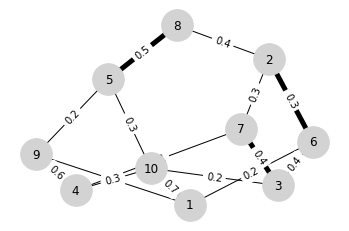

In [11]:
nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=1000, width=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=mw, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={(u,v): d['weight'] for u,v,d in G.edges(data=True)})
plt.axis('off')
plt.show()